## Proyek Klasifikasi Gambar: Dataset Animal-Faces
- **Nama:** Nisa Agni Afifah
- **Email:** agniafifah21@gmail.com
- **ID Dicoding:** Nisa Agni Afifah

# Introduction

Proyek ini menggunakan dataset Animal Faces yang diambil dari Kaggle, yang telah dikompres menjadi sebuah file zip berisi 15.716 gambar yang dibagi menjadi tiga kategori: anjing, kucing, dan hewan liar. Model klasifikasi yang diterapkan adalah model Sequential dengan dua lapisan Conv2D, diikuti oleh model dasar MobileNetV2 yang dibekukan untuk keperluan transfer learning, tiga lapisan pooling, dan empat lapisan dense. MobileNetV2 dipilih karena kemampuannya yang ringan namun tetap memberikan akurasi yang baik dibandingkan dengan ResNet50 dan VGG16. Dataset Animal Faces dengan tiga kategori ini dipilih karena menyajikan permasalahan klasifikasi citra yang umum namun tetap menantang, sehingga cocok untuk menguji performa model MobileNetV2 dalam mengenali berbagai jenis hewan dengan tingkat akurasi yang optimal.

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install tensorflowjs --no-cache-dir

**Installs gdown**

Ini memungkinkan pengunduhan dataset langsung dari Google Drive.

In [3]:
# Install Google Drive Downloader (GDown) library to directly download files from Google Drive
!pip install gdown

**Imports and checks TensorFlow version**

Itu memastikan bahwa TensorFlow tersedia dan mencetak versinya, misalnya TensorFlow versi 2.18.0 dalam kasus ini.

In [4]:
# Import TensorFlow, then check for the latest version
import tensorflow as tf
print(tf.__version__)

2.19.0


**Import other libraries**

Mengimpor berbagai pustaka untuk manipulasi data, visualisasi, dan tugas pembelajaran mesin. Ini termasuk zipfile, os, pathlib, pandas, numpy, keras, matplotlib, dll.

In [5]:
# Import Library
import os
import pathlib
import zipfile
from collections import Counter

import gdown
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import files

## Data Preparation

### Data Loading

**Download Datset**

Kode ini digunakan untuk mengunduh dataset gambar wajah hewan dalam format zip dari Google Drive ke direktori sementara di lingkungan Colab. Dataset tersebut kemungkinan merupakan hasil penggabungan dari beberapa dataset yang berasal dari Kaggle.

In [6]:
import gdown

file_id = "1oT8DVRC9jSiyCmGRTO5AQMySkwHSE0cR"  # ID dari link Google Drive
output = "animal-faces.zip"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1oT8DVRC9jSiyCmGRTO5AQMySkwHSE0cR
From (redirected): https://drive.google.com/uc?id=1oT8DVRC9jSiyCmGRTO5AQMySkwHSE0cR&confirm=t&uuid=32a6ceca-ae92-480d-b6cd-7d433353be46
To: /content/animal-faces.zip
100%|██████████| 711M/711M [00:09<00:00, 72.0MB/s]


'animal-faces.zip'

**Extract Dataset**

In [7]:
import zipfile

local_zip = "/content/animal-faces.zip"
extract_path = "/content"
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed. Files are in:", extract_path)


Extraction completed. Files are in: /content


**Data Structures and Variables for Loading Animal Faces Images**

Kode dibawah ini mengatur variabel dan struktur data penting untuk memuat dan mengelola dataset gambar wajah hewan. Kode ini mendefinisikan TARGET_SIZE dan BATCH_SIZE untuk mengubah ukuran gambar dan pemrosesan batch selama pelatihan model. Direktori gambar (img_dir) dan daftar kategori bunga (animal_face_label) juga ditetapkan sebagai label. Daftar kosong img_data dan label_name dibuat untuk menyimpan jalur gambar dan labelnya, sementara total_img menyimpan jumlah total gambar dalam dataset. Selain itu, sebuah kamus bernama class_counts diinisialisasi untuk melacak jumlah gambar di setiap kategori wajah hewan. Inisialisasi ini mempersiapkan proses pemuatan dan analisis dataset dengan lebih efisien.

In [8]:
# Set TARGET_SIZE and BATCH_SIZE
TARGET_SIZE = 160
BATCH_SIZE = 100

# Load image data
img_dir = '/content/animal-faces'

# Initializing variable animal_face_label containing list of flowers
animal_face_label = ['cat', 'dog', 'wild']

# Initializing variables img_data and label_name
img_data = []
label_name = []

# Initializing variabel total_img to save count of all image data
total_img = 0

# Take images from each class
class_counts = {labels: 0 for labels in animal_face_label}

In [9]:
# Pastikan img_dir sudah benar dan ada
if not os.path.exists(img_dir):
    raise FileNotFoundError(f"Directory {img_dir} not found.")

img_data = []
label_name = []
class_counts = {label: 0 for label in animal_face_label}
total_img = 0

for labels in animal_face_label:
    category_path = os.path.join(img_dir, labels)  # Menggabungkan path dengan benar

    if not os.path.exists(category_path):  # Cek apakah folder ada
        print(f"Warning: Category folder '{category_path}' not found. Skipping.")
        continue  # Lewati jika tidak ada folder

    category_img_files = os.listdir(category_path)  # List semua file dalam folder kategori
    np.random.shuffle(category_img_files)  # Acak daftar gambar

    print(f"Category {labels} has {len(category_img_files)} images")  # Debugging jumlah gambar

    total_img += len(category_img_files)  # Hitung total gambar

    for img_file in category_img_files:
        img_data.append(os.path.join(category_path, img_file))  # Simpan path gambar
        label_name.append(labels)  # Simpan label
        class_counts[labels] += 1  # Tambah hitungan kelas

# Buat DataFrame
df_balancing = pd.DataFrame({'img': img_data, 'label': label_name})

# Tampilkan total jumlah data
total_data = len(df_balancing)
print(f"Total number of images: {total_data}")

Category cat has 5239 images
Category dog has 5239 images
Category wild has 5238 images
Total number of images: 15716


Count of overall image data before balancing: 15716 files


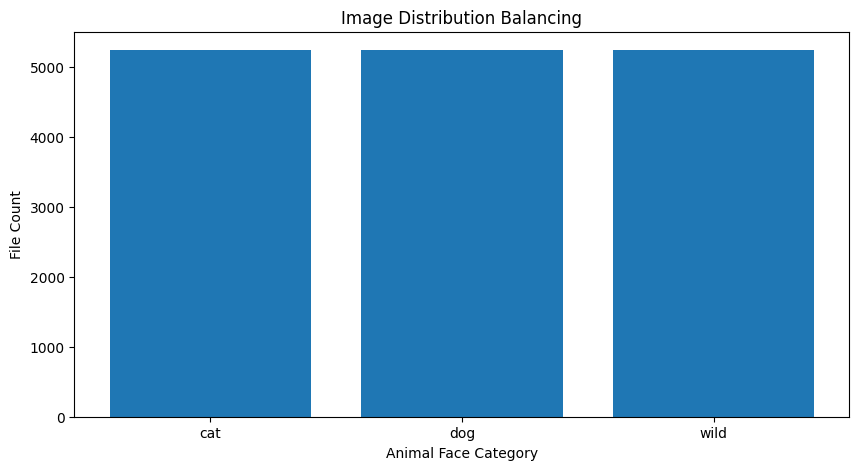

In [10]:
# Visualizing image distribution in each class balancing
print(f"Count of overall image data before balancing: {df_balancing['img'].count()} files")

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('Image Distribution Balancing')
plt.xlabel('Animal Face Category')
plt.ylabel('File Count')
plt.show()

Hasil balancing data menunjukkan distribusi gambar yang merata pada tiga kategori wajah hewan: cat, dog, dan wild, masing-masing sekitar 5.000 gambar. Total gambar sebelum balancing adalah 15.716 file. Proses ini bertujuan untuk menghindari bias pada model dan memastikan pelatihan yang lebih akurat.









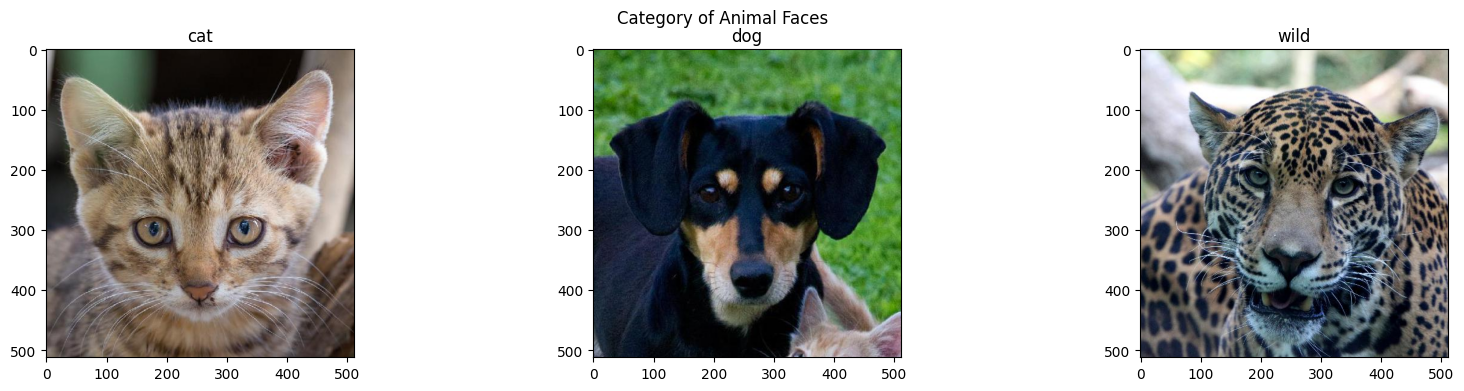

In [11]:
# Visualizing image to check one of the images from each category
fig, ax = plt.subplots(ncols=len(animal_face_label), figsize=(20, 4))
fig.suptitle('Category of Animal Faces')

RANDOM_NUM = 12

for i, label in enumerate(animal_face_label):
  ax[i].set_title(label)
  ax[i].imshow(plt.imread(df_balancing[df_balancing['label']==label]['img'].iloc[RANDOM_NUM]))


In [12]:
# Checking for image shape of a random image before any preprocessing technique is conducted
plt.imread(df_balancing['img'][0]).shape

(512, 512, 3)

#Data Preprocessing

### Split Dataset

Kode ini dimulai dengan mengimpor fungsi train_test_split dari sklearn.model_selection, yang berfungsi untuk membagi dataset menjadi training set, validation set, dan testing set. Setelah itu, kode menyiapkan proses pembagian dataset dengan menetapkan jalur gambar (img) ke variabel X dan label yang sesuai (label) ke variabel y, keduanya diambil dari DataFrame yang sudah diseimbangkan (df_balancing). Langkah ini bertujuan untuk mengatur data agar siap digunakan dalam proses pemisahan dataset.

In [13]:
# Importing 'train_test_split' library from sklearn for splitting purpose
from sklearn.model_selection import train_test_split

# Initializing variables X (img) and Y (label) from the dataframe 'df_after_balancing'
X = df_balancing['img']
y = df_balancing['label']

Kemudian kode tersebut dilanjutkan dengan membagi dataset menjadi tiga bagian: training, validation, dan testing dengan proporsi 70%:15%:15%. Proses pertama adalah memisahkan 15% dari data untuk testing menggunakan fungsi train_test_split dengan parameter random_state agar pemisahan dapat direproduksi secara konsisten. Sisa data sebesar 85% kemudian dibagi lebih lanjut menjadi training set dan validation set menggunakan kelas ImageDataGenerator dari tf.keras.preprocessing.image. Kelas ini memungkinkan augmentasi data secara langsung (on-the-fly) dan pemisahan data berdasarkan parameter validation_split. Pendekatan ini memastikan model dilatih dengan berbagai variasi gambar dan dievaluasi menggunakan validation set terpisah untuk memantau kinerjanya selama proses pelatihan.

In [14]:
# Splitting dataframe into test data, train data, and validation data with the proportion of 70:15:15
# First, splitting dataframe into remaining data and test data with the proportion of 85:15
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Then, splitting the 85% remaining data into 85% test data and 15% validation data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1765, #17.65% dari 85% remaining data digunakan sebagai 15% validation data
    rotation_range=20,
    horizontal_flip=True,
    brightness_range=(1.125, 1.50),
    shear_range=0.2,
    fill_mode='nearest',
    zoom_range=0.3,
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1765
)

# Third, initalizing variables train_img (70% test data), val_img (15% validation data), and test_img (15% test data)
train_img = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'img': X_train_val, 'label': y_train_val}),
    directory=img_dir,
    x_col='img',
    y_col='label',
    target_size=(TARGET_SIZE, TARGET_SIZE),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='training',
    seed=42
)

val_img = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'img': X_train_val, 'label': y_train_val}),
    directory=img_dir,
    x_col='img',
    y_col='label',
    target_size=(TARGET_SIZE, TARGET_SIZE),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    subset='validation',
    seed=42
)

test_img = test_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'img': X_test, 'label': y_test}),
    directory=img_dir,
    x_col='img',
    y_col='label',
    target_size=(TARGET_SIZE, TARGET_SIZE),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False,
    seed=42
)

Found 11001 validated image filenames belonging to 3 classes.
Found 2357 validated image filenames belonging to 3 classes.
Found 2358 validated image filenames belonging to 3 classes.


## Modelling

Menggunakan **sequential model** dan mendefinisikan konstanta penting untuk model, seperti IMG_SIZE, IMG_SHAPE, NUM_CLASSES, dan EPOCHS. Konstanta-konstanta ini menentukan dimensi gambar input, jumlah kelas keluaran (kategori wajah hewan), dan jumlah epoch pelatihan.

In [15]:
# Creating constants IMG_SIZE, IMG_SHAPE, NUM_CLASSES, and EPOCHS
IMG_SIZE = (TARGET_SIZE, TARGET_SIZE)
IMG_SHAPE = IMG_SIZE + (3, )
NUM_CLASSES = len(animal_face_label)
EPOCHS = 100

Kemudian, kode ini memanfaatkan transfer learning dengan menggunakan model MobileNetV2 sebagai base model yang telah dilatih sebelumnya pada dataset ImageNet. Hal ini memanfaatkan pengetahuan yang telah diperoleh dari dataset besar untuk meningkatkan performa model dalam tugas klasifikasi wajah hewan. Untuk mencegah bobot (weights) yang sudah dilatih sebelumnya di dalam base model mengalami perubahan signifikan selama pelatihan awal, kode ini membekukan semua lapisan dalam MobileNetV2 dengan mengatur layer.trainable = False untuk setiap lapisan. Ini memastikan bahwa pelatihan awal difokuskan pada penyesuaian lapisan baru yang ditambahkan ke dataset gambar wajah hewan, sambil mempertahankan fitur berharga yang dipelajari dari ImageNet.

Setelah itu, kode ini membangun model sequential menggunakan tf.keras.models.Sequential. Arsitektur model ini menumpuk lapisan secara berurutan, memungkinkan aliran data yang jelas melalui jaringan. Base model MobileNetV2 ditambahkan sebagai lapisan pertama, diikuti dengan lapisan-lapisan konvolusional tambahan (Conv2D), lapisan normalisasi batch (BatchNormalization), lapisan max pooling (MaxPooling2D), lapisan global average pooling (GlobalAveragePooling2D), dan lapisan dense (Dense) dengan regularisasi dropout (Dropout). Kombinasi lapisan-lapisan ini membentuk jaringan saraf dalam yang mampu mempelajari pola kompleks dalam gambar wajah hewan.

In [16]:
# Building a sequential convolutional model by adopting transfer learning
# Adopting MobileNetV2 transfer learning as the 'base_model'
'''Transfer learning MobileNetV2 is suitable in the use case of flower classification, as seen on this project.'''
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SHAPE),
    weights='imagenet',
    include_top=False,
    )

# Disabling all layers without any exception on the MobileNetV2 transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Initializing the sequential model with several supporting layers
model = tf.keras.models.Sequential([
    # 'base_model' adopted from the transfer learning as the input
    base_model,

    # Additional two Conv2D layers and two MaxPooling layers
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # pooling layer pertama
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # pooling layer kedua

    # A GlobalAveragePooling layer
    tf.keras.layers.GlobalAveragePooling2D(), # pooling layer ketiga

    # Four additional dense layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Creating 'callback' class to stop training if the accuracy reaches 96% or there is no significant decrease of 'val_loss' after following 10 iterations
class early_stopping(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96 and logs.get('val_accuracy')>0.9699):
      print("\nWell done, the model accuracy just reached 96%!")
      self.model.stop_training = True

callbacks = [
        early_stopping(),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
    ]

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Bagian di bawah ini berfokus pada menampilkan arsitektur dari base model (dalam hal ini MobileNetV2) dan model sequential. Kode ini menggunakan metode summary() untuk mencetak gambaran ringkas dari setiap lapisan model, bentuk keluaran (output shapes), dan jumlah parameter. Visualisasi ini membantu dalam memahami struktur dan kompleksitas dari kedua model, baik model base yang telah dilatih sebelumnya maupun model sequential yang dibangun secara khusus.

Kemudian, kode ini mencoba memuat bobot (weights) yang telah dilatih sebelumnya untuk model sequential dari sebuah file bernama 'best_sequential_model.keras'. Untuk mengatasi kemungkinan kesalahan, digunakan blok try-except. Jika file tersebut ditemukan, bobot akan dimuat ke dalam model, yang berpotensi menghemat waktu pelatihan dan meningkatkan performa. Langkah ini memungkinkan pelatihan dilanjutkan dari titik penyimpanan sebelumnya atau menggunakan model yang sudah terlatih untuk melakukan inference.

In [17]:
# MobileNetV2 architecture summary
base_model.summary()

# Built sequential convolutional model architecture summary
print("\n")
model.summary()

# Creating exception to check whether there is 'best_sequential_model.h5" available or not
try:
    model.load_weights('best_model.keras')
    print("Weights loaded successfully from file 'best_model.keras'")
except Exception as e:
    print(f"Failed to load weights: {e}")


Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 5, 5, 128)           │       1,474,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 5, 5, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 2, 2, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,013,187 (15.31 MB)

 Trainable params: 1,754,819 (6.69 MB)

 Non-trainable params: 2,258,368 (8.61 MB)

Failed to load weights: [Errno 2] No such file or directory: 'best_model.keras'


Selanjutnya kode di bawah ini mempersiapkan dan menjalankan pelatihan dari sebuah model sequential. Kode ini menghitung parameter pelatihan seperti steps_per_epoch dan validation_steps. Kemudian, model dikompilasi menggunakan optimizer Adam dengan nilai learning rate yang diatur menjadi 0.0001, fungsi loss categorical cross-entropy, dan metrik accuracy. Terakhir, model dilatih menggunakan data pelatihan dan validasi, sejumlah epoch yang telah ditentukan, dan callbacks, sambil membersihkan sesi backend TensorFlow sebelumnya. Riwayat pelatihan disimpan untuk analisis lebih lanjut.

In [18]:
# Setting the value of 'steps_per_epoch' dan 'validation_steps' as the training parameters
steps_per_epoch = train_img.samples // BATCH_SIZE
validation_steps = val_img.samples // BATCH_SIZE
test_steps = test_img.samples // BATCH_SIZE

# Pastikan bahwa nilai steps_per_epoch dan validation_steps lebih besar dari 0
if steps_per_epoch == 0 or validation_steps == 0 or test_steps == 0:
    raise ValueError("Steps per epoch, validation steps, atau test steps bernilai 0. Pastikan ukuran BATCH_SIZE lebih kecil dari jumlah data yang tersedia.")

# Compiling sequential model with learning rate set to 0.0001
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001, clipnorm=5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Bersihkan sesi Keras sebelumnya
tf.keras.backend.clear_session()

# Training the compiled sequential model by using training set and validation set
train_history = model.fit(
    train_img,
    validation_data=val_img,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1,
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5974 - loss: 0.8613 - val_accuracy: 0.9809 - val_loss: 0.0717
Epoch 2/100
  1/110 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.9900 - loss: 0.1150

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Well done, the model accuracy just reached 96%!
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.9900 - loss: 0.1150 - val_accuracy: 0.9857 - val_loss: 0.0677


## Evaluasi dan Visualisasi

**Evaluation and prediction of the compiled model**

Mengevaluasi performa dari model sequential yang telah dilatih menggunakan dataset uji. Kode ini menggunakan metode evaluate(), dengan menyediakan data uji (test_img) dan jumlah langkah yang akan diproses (test_steps). Hasil evaluasi, termasuk metrik seperti loss dan accuracy, disimpan dalam variabel eval_history untuk analisis dan pelaporan lebih lanjut. Langkah evaluasi ini bertujuan untuk menilai kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya.

In [19]:
# Evaluating the sequential model by using test set
eval_history = model.evaluate(
    test_img,
    steps=test_steps
)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.9905 - loss: 0.0367


In [20]:
# Predicting the sequential model by using test set
predict_history = model.predict(
    test_img,
    verbose=0
)

#hasil prediksi
predict_history = predict_history.copy()

Kemudian, variabel-variabel berikut diinisialisasi sebagai titik penyimpanan untuk metrik akurasi dan loss pada dataset pelatihan, dataset uji, dan dataset validasi.









In [21]:
# Saving the accuracy and error (loss rate) summary into several following variables
accuracy = train_history.history['accuracy'][-1]
val_accuracy = train_history.history['val_accuracy'][-1]
test_accuracy = eval_history[1]
loss = train_history.history['loss'][-1]
val_loss = train_history.history['val_loss'][-1]
test_loss = eval_history[0]

**Accuracy and Loss Visualization**

Potongan kode ini memvisualisasikan kemajuan pelatihan dari model sequential, khususnya akurasi dan loss selama epoch. Jika data validasi tersedia, kode ini mencetak akurasi akhir dan akurasi validasi, lalu membuat plot dengan dua subplot. Subplot ini menampilkan kurva akurasi/loss untuk pelatihan dan validasi, memberikan wawasan tentang proses pembelajaran model dan potensi overfitting. Jika tidak ada data validasi yang ditemukan, kode ini mencetak pesan yang menunjukkan bahwa tidak ada data yang tersedia untuk evaluasi.

Accuracy rate: 99.00%
Validation accuracy rate: 98.57%




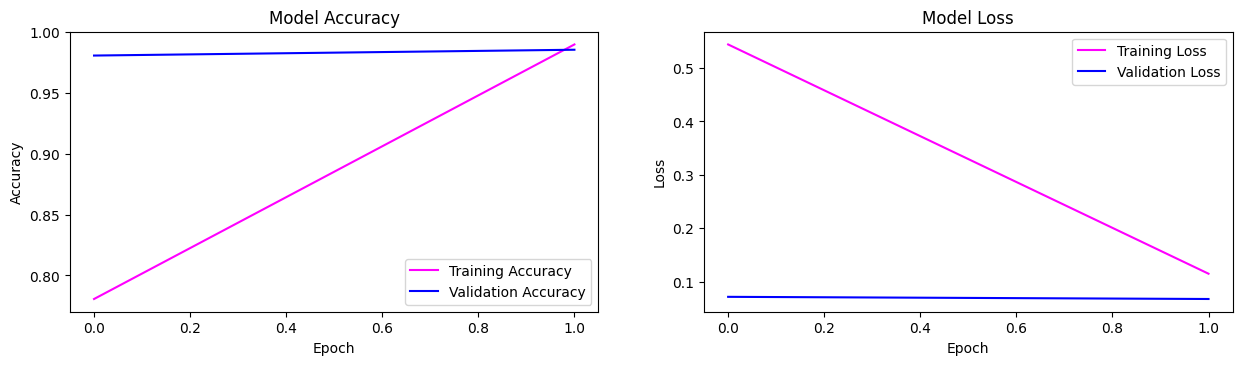

In [22]:
# Visualizing accuracy and loss rate from the sequential model training result
import matplotlib.pyplot as plt

if train_history.history.get('val_loss') is not None:
    # Mendapatkan akurasi dan akurasi validasi terakhir dari history
    print(f"Accuracy rate: {accuracy:.2%}")
    print(f"Validation accuracy rate: {val_accuracy:.2%}\n\n")

    plt.figure(1, figsize=(15, 8))

    # Plot Model Accuracy
    plt.subplot(221)
    plt.plot(train_history.history['accuracy'], color='magenta')
    plt.plot(train_history.history['val_accuracy'], color='blue')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])

    # Plot Model Loss
    plt.subplot(222)
    plt.plot(train_history.history['loss'], color='magenta')
    plt.plot(train_history.history['val_loss'], color='blue')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Validation Loss'])

    plt.show()
else:
    print("No data available for evaluation...")


**Test and Prediction Visualization With Confusion Matrix**

Bagian ini mengevaluasi dan menampilkan hasil dari model klasifikasi yang telah dilatih menggunakan dataset uji. Kode ini mengimpor pustaka yang dibutuhkan, mengambil label asli dan label yang diprediksi, lalu membuat confusion matrix menggunakan seaborn dan matplotlib. Jika data uji tersedia, kode ini akan mencetak akurasi pengujian dan menampilkan confusion matrix. Selain itu, kode ini juga menampilkan laporan klasifikasi yang berisi informasi penting seperti presisi, recall, dan skor F1. Jika data uji tidak ditemukan, kode akan memberikan pesan bahwa tidak ada data yang bisa dievaluasi.

Test accuracy rate: 98.96%


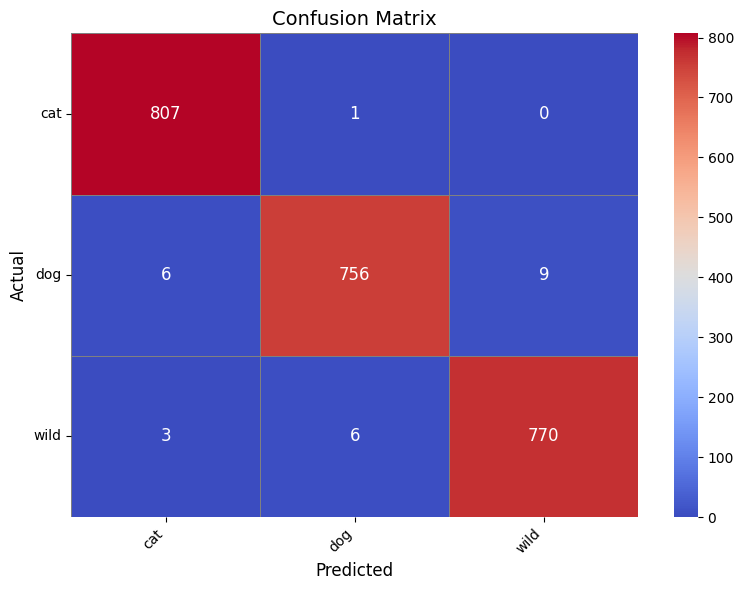


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0     0.9890    0.9988    0.9938       808
           1     0.9908    0.9805    0.9857       771
           2     0.9884    0.9884    0.9884       779

    accuracy                         0.9894      2358
   macro avg     0.9894    0.9893    0.9893      2358
weighted avg     0.9894    0.9894    0.9894      2358



In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Initializing variables y_true, y_pred, and labels
y_true = test_img.classes
y_pred = np.argmax(predict_history, axis=1)
labels = animal_face_label

# Filtering predictions to avoid unseen labels
unique_labels = np.unique(test_img.classes)
filtered_y_pred = [p for p in y_pred if p in unique_labels]
filtered_y_true = [t for t, p in zip(y_true, y_pred) if p in unique_labels]

# Visualizing testing and prediction metrics with confusion matrix and classification report
if test_loss is not None:
    print(f"Test accuracy rate: {test_accuracy:.2%}")

    # Creating confusion matrix
    conf_mat = confusion_matrix(filtered_y_true, filtered_y_pred, labels=unique_labels)
    df_conf_mat = pd.DataFrame(conf_mat, index=labels, columns=labels)

    # 🔹 Perubahan warna heatmap ke 'coolwarm'
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_conf_mat, annot=True, annot_kws={"size": 12}, cmap='coolwarm', fmt='d', linewidths=0.5, linecolor='gray')

    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.title("Confusion Matrix", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Creating classification report
    print("\nCLASSIFICATION REPORT\n")
    print(classification_report(y_true, y_pred, digits=4))

else:
    print("No data available for evaluation...")

Dari proyek ini, dapat disimpulkan bahwa MobileNetV2 adalah salah satu model transfer learning yang cocok untuk klasifikasi gambar wajah hewan selain VGG16 dan ResNet50. Hal ini dibuktikan dengan evaluasi yang menunjukkan tingkat akurasi, akurasi validasi, dan akurasi pengujian yang tinggi, disertai dengan penurunan loss dan validasi loss yang terus-menerus dan stabil. Selain itu, precision, recall, dan f1-score juga menunjukkan hasil yang sangat menjanjikan seperti yang ditunjukkan dalam laporan klasifikasi.

Salah satu keunggulan MobileNetV2 sebagai model transfer learning yang cocok dalam klasifikasi gambar wajah hewan adalah efisiensinya dalam hal parameter pelatihan. Artinya, kita tidak perlu mengatur terlalu banyak parameter pelatihan hanya untuk meningkatkan akurasi pelatihan, terutama jika kita tidak menerapkan penyetelan hyperparameter khusus yang tidak diterapkan dalam proyek ini (seperti LRonPlateau, LoRA, learning rate yang sangat lambat, dll.).

# Save Model

Dalam Format **Save Model**

In [24]:
model.export("saved_model/my_model")
print("Model berhasil disimpan dalam format SavedModel")


Saved artifact at 'saved_model/my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  131996701609232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701610000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701612688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701612304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701611152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701612880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701611920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701609616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701613072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701610960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996

Dalam Format **TFJS**

In [26]:
import tensorflowjs as tfjs
import os

tfjs_model_path = "tfjs_model"
os.makedirs(tfjs_model_path, exist_ok=True)  # Pastikan folder ada

tfjs.converters.save_keras_model(model, tfjs_model_path)

print(f"Model berhasil disimpan dalam format TensorFlow.js di {tfjs_model_path}")

failed to lookup keras version from the file,
    this is likely a weight only file
Model berhasil disimpan dalam format TensorFlow.js di tfjs_model


Dalam Format **TF-Lite**

In [27]:
import tensorflow as tf
import os

# Pastikan folder tujuan ada
tflite_model_path = "tflite/model.tflite"
os.makedirs("tflite", exist_ok=True)

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"Model berhasil dikonversi dan disimpan dalam format TensorFlow Lite di {tflite_model_path}")


Saved artifact at '/tmp/tmpu7z_ngfa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  131996701609232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701610000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701612688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701612304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701611152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701612880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701611920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701609616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701613072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131996701610960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1319967016

In [28]:
labels = ["Cat", "Dog", "Wildlife"]  # Gantilah dengan label sesuai dataset

with open("tflite/label.txt", "w") as f:
    for label in labels:
        f.write(label + "\n")

print("Label berhasil disimpan dalam 'tflite/label.txt'")


Label berhasil disimpan dalam 'tflite/label.txt'


In [31]:
!pip freeze > requirements.txt

## Konversi Model

## Inference (Optional)

In [32]:
#inference dengan TF-Lite

import tensorflow as tf
import numpy as np

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="tflite/model.tflite")
interpreter.allocate_tensors()

# Dapatkan indeks input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Contoh data input (gantilah dengan data yang sesuai)
input_shape = input_details[0]['shape']
dummy_input = np.random.rand(*input_shape).astype(np.float32)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], dummy_input)

# Jalankan inferensi
interpreter.invoke()

# Ambil hasil output
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Hasil Prediksi (TF-Lite):", output_data)


Hasil Prediksi (TF-Lite): [[0.06775202 0.86660975 0.06563825]]


/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [36]:
#inference dengan save model
import tensorflow as tf
import numpy as np

# Path ke model SavedModel
saved_model_path = "saved_model/my_model"

# Gunakan TFSMLayer untuk memuat model
model = tf.keras.layers.TFSMLayer(saved_model_path, call_endpoint="serving_default")

# Contoh data input (sesuaikan dengan model)
dummy_input = np.random.rand(1, 224, 224, 3).astype(np.float32)  # Pastikan shape sesuai dengan model

# Jalankan prediksi
output_data = model(dummy_input)  # TFSMLayer dipanggil seperti layer biasa
print("Hasil Prediksi (SavedModel):", output_data)


Hasil Prediksi (SavedModel): {'output_0': <tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.11828014, 0.74791574, 0.13380413]], dtype=float32)>}
